In [31]:
import torch
import numpy as np
import pickle

In [32]:
import matplotlib.pyplot as plt

In [33]:
with open('small_cell_500ms_noise.pickle','rb+') as f:
    tt,uu=pickle.load(f)
    #tt为时间刻度，uu为电压

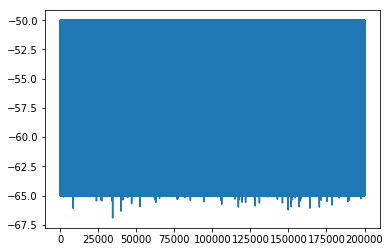

In [34]:
plt.plot(tt,uu)

In [35]:
print(len(tt))

200000


In [36]:
m = len(tt)
np.random.seed(2020)
mu=0
sigma=0.02**2
epslo= np.random.normal(mu, sigma, m)#噪音

In [40]:
epslo2= np.random.normal(mu, sigma, m)#噪音

In [37]:
s2=np.zeros(m)
for i in range(m):
    if i%500==0:
        u_ = uu[i-500:i]
        s2[i]=len(u_[u_>=-50])

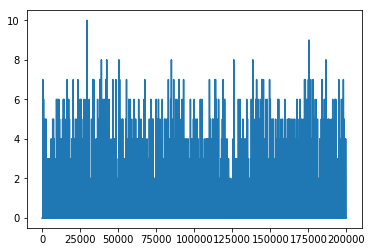

In [38]:
plt.plot(tt,s2)

In [45]:
yj=0.1 #equation 1中的参数
a=0.1;b=0.2#equation 2中的参数

In [46]:
Ct=torch.zeros(m)
Yt=torch.zeros(m)
for i in range(m-1):
    Ct[i+1]=yj*Ct[i]+s2[i+1]+epslo2[j]
for j in range(m):
    Yt[j]=a*(Ct[j]+b)+epslo[j]

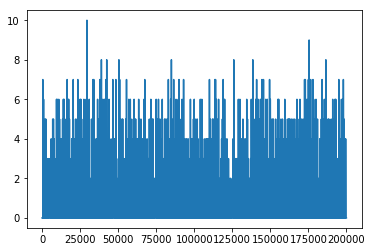

In [47]:
plt.plot(tt,Ct)

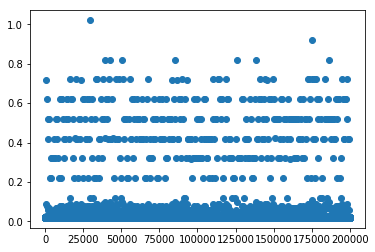

In [48]:
plt.plot(tt,Yt,'o')
plt.show()

In [49]:
with open('Ga_xinhao_500ms_noise.pickle','wb') as f:
    pickle.dump(Yt,f)
with open('Ga_xinhao_500ms2_noise.pickle','wb') as f:
    pickle.dump(Ct,f)